<a href="https://colab.research.google.com/github/KLeeDE/ResearchProj_UrbanHeat/blob/master/TimeSeries/2021_01_24_Mar14_15_ChangePointDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fourier Transform
* Fourier Transform is for source selection 

#Change Points to Detection
* Change points to detection is for finding a spike in air conditioner units.
* The purpose of applying this method is to find out whether there is a change in usage of air conditioner.

# JPG images

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import numpy as np
import pandas as pd
import imageio as iio
import matplotlib.pyplot as plt

* Pictures are taken by every 10 seconds 
* All pictures in one day (24 hr) = 8,640

In [12]:
# -- get file list (this may take some time)

import os
import glob

srch14 = os.path.join("drive", "My Drive", "urban_heat", "data", "singapore_ir", 
                    "03-14", "*.jpeg")
flist14 = sorted(glob.glob(srch14))

print("2020 March 14 data - number of files is {0}".format(len(flist14)))

srch15 = os.path.join("drive", "My Drive", "urban_heat", "data", "singapore_ir", 
                    "03-15", "*.jpeg")
flist15 = sorted(glob.glob(srch15))

print("2020 March 15 data - number of files is {0}".format(len(flist15)))

2020 March 14 data - number of files is 8608
2020 March 15 data - number of files is 8607


In [13]:
# -- get the paths and image times

# -- set file name
fname14 = os.path.join("drive", "My Drive", "urban_heat", "output", "paths_times_0314.csv")

# -- check that the file exists, create if it does not
if os.path.isfile(fname14):
  flist_df14 = pd.read_csv(fname14)
else:

  # -- get file list (this may take some time)
  srch14 = os.path.join("drive", "My Drive", "urban_heat", "data", "singapore_ir", 
                      "03-14", "*.jpeg")
  flist14 = sorted(glob.glob(srch14))

  print("number of files is {0}".format(len(flist14)))

  # -- get array of times
  times = []
  for ii in range(len(flist14)):
    stmp = os.path.split(flist14[ii])[1][5:-8]

    yr = stmp[:4]
    mo = stmp[5:7]
    dy = stmp[8:10]
    hr = stmp[11:13]
    mn = stmp[14:16]
    sc = stmp[17:19]

    times.append(pd.to_datetime("{0}-{1}-{2} {3}:{4}:{5}".format(yr, mo, dy, hr, mn, sc)))

  # -- convert to array
  times14 = np.array(times)

  # -- put into DataFrame
  flist_df14 = pd.DataFrame()
  flist_df14["path"] = flist14
  flist_df14["time"] = times14

  # -- write DataFrame to file
  flist_df14.to_csv(fname14, index=False)

In [14]:
flist_df14

,path,time
0,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:03
1,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:13
2,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:23
3,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:33
4,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:43
...,...,...
8603,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 23:59:12
8604,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 23:59:22
8605,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 23:59:32
8606,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 23:59:42


In [15]:
# -- get the paths and image times

# -- set file name
fname15 = os.path.join("drive", "My Drive", "urban_heat", "output", "paths_times_0315.csv")

# -- check that the file exists, create if it does not
if os.path.isfile(fname15):
  flist_df15 = pd.read_csv(fname15)
else:

  # -- get file list (this may take some time)
  srch15 = os.path.join("drive", "My Drive", "urban_heat", "data", "singapore_ir", 
                      "03-15", "*.jpeg")
  flist15 = sorted(glob.glob(srch15))

  print("number of files is {0}".format(len(flist15)))

  # -- get array of times
  times = []
  for ii in range(len(flist15)):
    stmp = os.path.split(flist15[ii])[1][5:-8]

    yr = stmp[:4]
    mo = stmp[5:7]
    dy = stmp[8:10]
    hr = stmp[11:13]
    mn = stmp[14:16]
    sc = stmp[17:19]

    times.append(pd.to_datetime("{0}-{1}-{2} {3}:{4}:{5}".format(yr, mo, dy, hr, mn, sc)))

  # -- convert to array
  times15 = np.array(times)

  # -- put into DataFrame
  flist_df15 = pd.DataFrame()
  flist_df15["path"] = flist15
  flist_df15["time"] = times15

  # -- write DataFrame to file
  flist_df15.to_csv(fname15, index=False)

In [16]:
flist_df15

,path,time
0,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 00:00:02
1,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 00:00:12
2,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 00:00:22
3,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 00:00:32
4,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 00:00:42
...,...,...
8602,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 23:59:11
8603,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 23:59:21
8604,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 23:59:31
8605,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 23:59:41


In [17]:
flist_df1415 = pd.concat([flist_df14, flist_df15])
flist_df1415

,path,time
0,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:03
1,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:13
2,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:23
3,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:33
4,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-14 00:00:43
...,...,...
8602,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 23:59:11
8603,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 23:59:21
8604,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 23:59:31
8605,drive/My Drive/urban_heat/data/singapore_ir/03...,2020-03-15 23:59:41


In [18]:
# -- set the file names
#pname = "/content/drive/My Drive/urban_heat/output/paths_times_0314-15.csv"
#fpaths = pd.read_csv(pname)
#fpaths = fpaths[(flist_df1415["time"] >= "2020-03-14 19:00:00") & (flist_df1415["time"]< "2020-03-15 04:00:00")]
ind = (flist_df1415["time"] >= "2020-03-14 19:00:00") & (flist_df1415["time"]< "2020-03-15 04:00:00")
fpaths = flist_df1415[ind]
fpaths = fpaths.path.values

print("there are {0} files on 03/15/20" \
      .format(len(fpaths)))

# Increase number of images from 100 to 300
# -- only take the first 300 images
#fpaths = fpaths[:300]

# -- read in the 0th image to get the image shape
img0 = np.asarray(iio.imread(fpaths[0]))[:, :, 0] / 255.
nrow, ncol = img0.shape


# -- initialize an array to hold all of the images
imgs = np.zeros((len(fpaths), nrow, ncol))


# -- read in the images
for ii, fname in enumerate(fpaths):
  if ii % 20 == 0:
    print("working on the {0} image".format(ii))

  imgs[ii, :, :] = np.asarray(iio.imread(fname))[:, :, 0] / 255.

there are 3228 files on 03/15/20
working on the 0 image
working on the 20 image
working on the 40 image
working on the 60 image
working on the 80 image
working on the 100 image
working on the 120 image
working on the 140 image
working on the 160 image
working on the 180 image
working on the 200 image
working on the 220 image
working on the 240 image
working on the 260 image
working on the 280 image
working on the 300 image
working on the 320 image
working on the 340 image
working on the 360 image
working on the 380 image
working on the 400 image
working on the 420 image
working on the 440 image
working on the 460 image
working on the 480 image
working on the 500 image
working on the 520 image
working on the 540 image
working on the 560 image
working on the 580 image
working on the 600 image
working on the 620 image
working on the 640 image
working on the 660 image
working on the 680 image
working on the 700 image
working on the 720 image
working on the 740 image
working on the 760 imag

In [19]:
imgs[ii, :, :].shape

(240, 320)

# Label pixels

In [20]:
# Increase labeld pixels 

# building is increased from 100 pixels to 150 pixels (1.5 times)
# window are increased from 30 pixels to 150 pixels (5 times)
# air conditioner and sky are 30 pixels as usual

# -- read in the labeled pixels 
acs = np.load("/content/drive/My Drive/urban_heat/output/acs_pix.npy")
bld = np.load("/content/drive/My Drive/urban_heat/output/bld_pix_150.npy")
sky = np.load("/content/drive/My Drive/urban_heat/output/sky_pix_20201112.npy")
win = np.load("/content/drive/My Drive/urban_heat/output/win_pix_150.npy")

# -- convert to pixel numbers
acs_col, acs_row = acs.round().astype(int).T
bld_col, bld_row = bld.round().astype(int).T
sky_col, sky_row = sky.round().astype(int).T
win_col, win_row = win.round().astype(int).T

# -- extract features from images
feat_acs = imgs[:, acs_row, acs_col].T
feat_bld = imgs[:, bld_row, bld_col].T
feat_sky = imgs[:, sky_row, sky_col].T
feat_win = imgs[:, win_row, win_col].T

# -- determine the shape of these images so that we know how to set up the convnet
acs_sh = acs.shape
bld_sh = bld.shape
sky_sh = sky.shape
win_sh = win.shape
acs_sh, bld_sh, sky_sh, win_sh

((30, 2), (150, 2), (30, 2), (150, 2))

In [21]:
#print(sky)
#print(sky_row)
#print(sky_col)
#len(sky_row), len(sky_col)

In [22]:
# -- extract features from images
#feat_acs = imgs[:, acs_row, acs_col].T
#feat_bld = imgs[:, bld_row, bld_col].T
#feat_sky = imgs[:, sky_row, sky_col].T
#feat_win = imgs[:, win_row, win_col].T

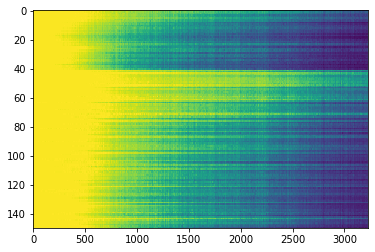

In [23]:
plt.imshow(feat_bld, aspect="auto", interpolation="nearest")

Text(0.5, 1.0, 'Air conditioner (7pm-4am, March 14-15, 2020)')

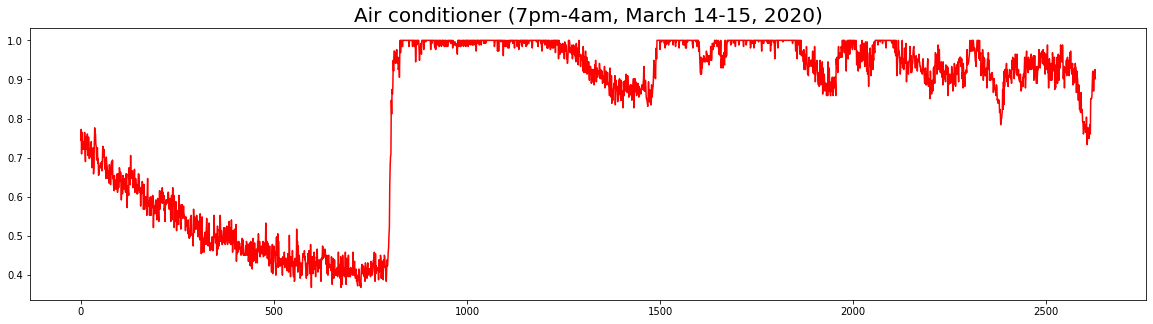

In [24]:
# Plot of air conditioner 
plt.figure(figsize=(20,5))
plt.plot(imgs[600:, 99, 90], color="red")
plt.title("Air conditioner (7pm-4am, March 14-15, 2020)", fontsize=20)

In [25]:
2000 / 360

5.555555555555555

In [26]:
4000/360

11.11111111111111

In [27]:
7000 / 360

19.444444444444443

In [28]:
8000 / 360

22.22222222222222

Text(0.5, 1.0, 'Air conditioner (7pm-4am, March 14-15, 2020)')

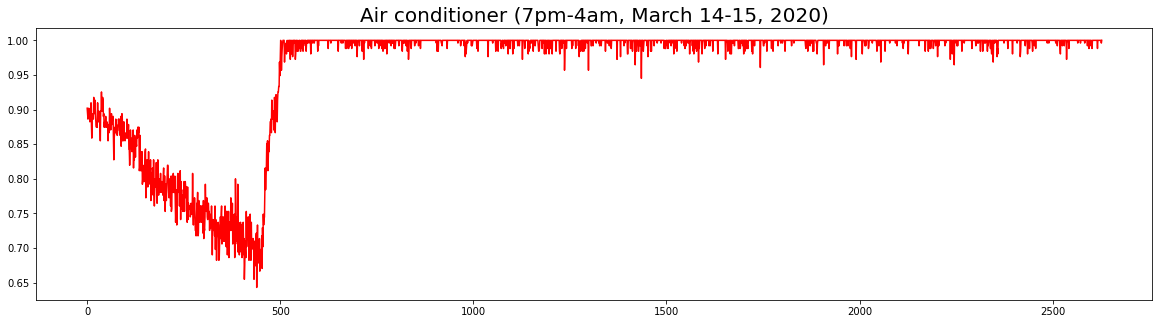

In [29]:
# Plot of air conditioner 
plt.figure(figsize=(20,5))
plt.plot(imgs[600:, 200, 125], color="red")
plt.title("Air conditioner (7pm-4am, March 14-15, 2020)", fontsize=20)

In [30]:
#plt.figure(figsize=(20,5))
#plt.plot(feat_acs[3,1,1,:], color="red")
#plt.title("Air conditioner (7pm-4am, March 13-15, 2020)", fontsize=20)

Text(0.5, 1.0, 'Sky (7pm-4am, March 14-15, 2020)')

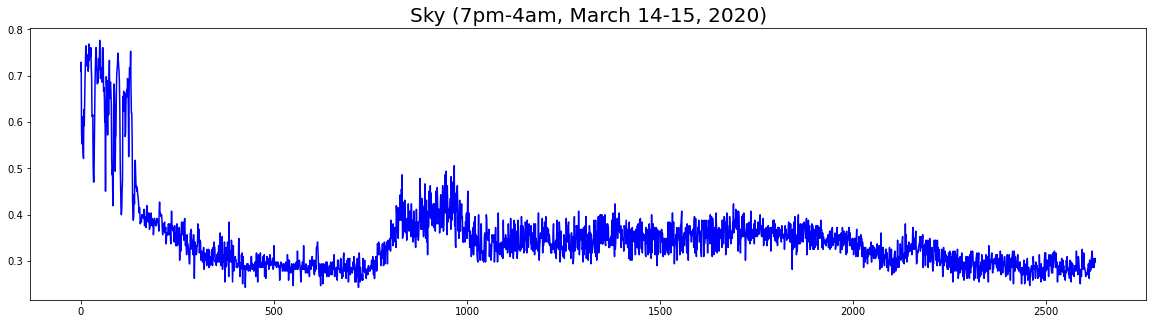

In [31]:
# Plot
plt.figure(figsize=(20,5))
plt.plot(imgs[600:, 10, 280], color="blue")
plt.title("Sky (7pm-4am, March 14-15, 2020)", fontsize=20)

In [32]:
4000/360

11.11111111111111

Text(0.5, 1.0, 'Window (7pm-4am, March 14-15, 2020)')

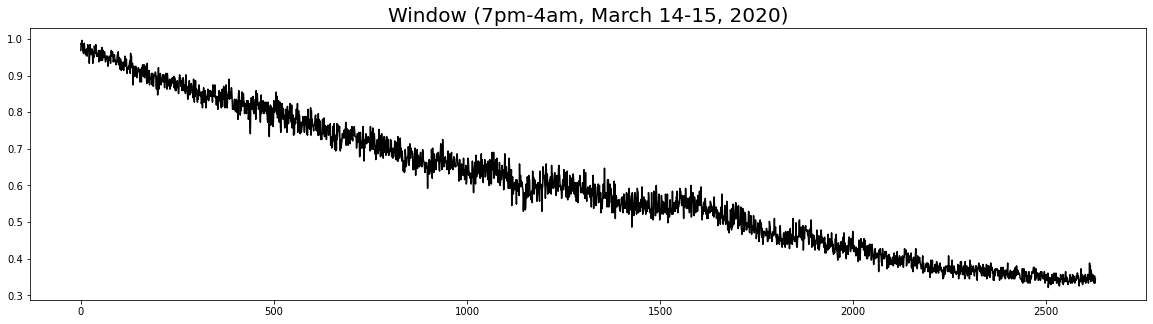

In [33]:
# Plot 
plt.figure(figsize=(20,5))
plt.plot(imgs[600:, 140, 200], color="black")
plt.title("Window (7pm-4am, March 14-15, 2020)", fontsize=20)

Text(0.5, 1.0, 'Building (7pm-4am, March 14-15, 2020)')

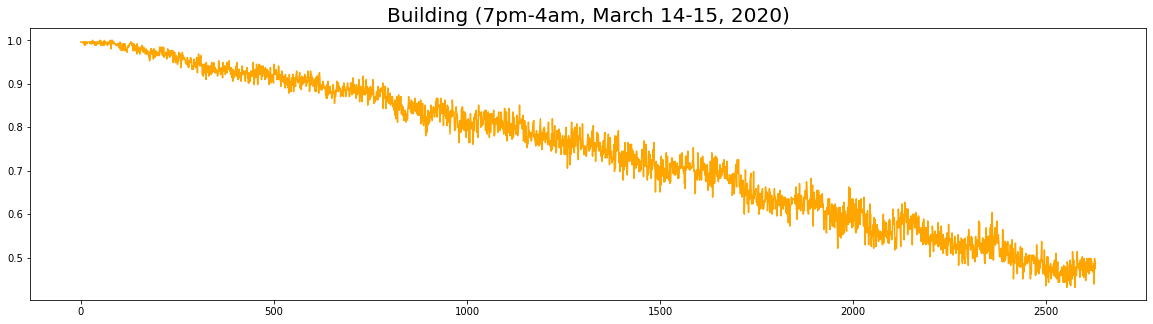

In [34]:
# Plot 
plt.figure(figsize=(20,5))
plt.plot(imgs[600:, 100, 175], color="orange")
plt.title("Building (7pm-4am, March 14-15, 2020)", fontsize=20)

In [35]:
600/360 # 9 pm - 4 am

1.6666666666666667

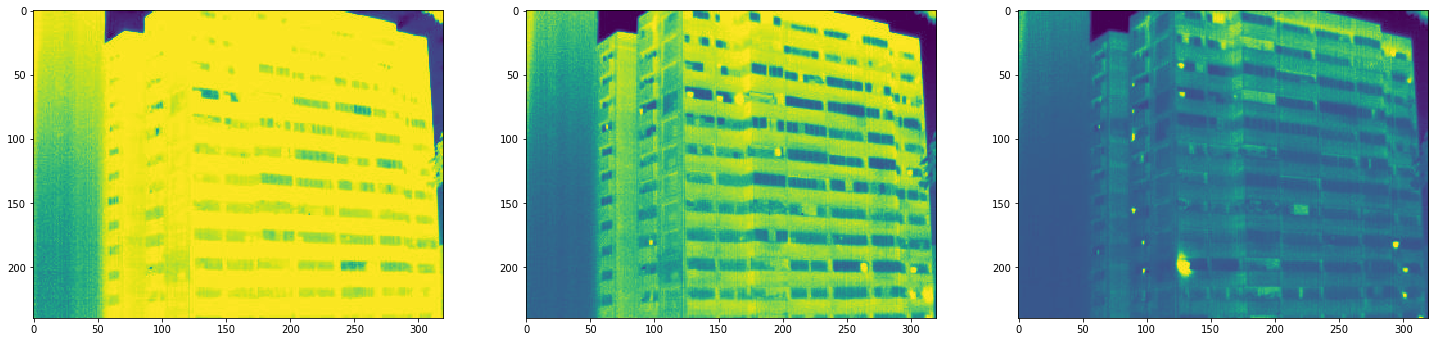

In [36]:
fig, ax = plt.subplots(1, 3, figsize=[25, 8])
ax[0].imshow(imgs[400], interpolation="nearest")
ax[1].imshow(imgs[1000], interpolation="nearest")
ax[2].imshow(imgs[3000], interpolation="nearest")
fig.show()

# Make features

In [37]:
#cube = imgs[:, 99-5:99+6, 90-5:90+6]

In [38]:
#for ii in range(30):
  #print(feat_sky[ii].shape)

In [39]:
# Make features

# Air conditioner

feat_acs = []

for ii in range(len(acs_row)):
  trow = acs_row[ii]
  tcol = acs_col[ii]
  feat_acs.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_acs = np.array(feat_acs)
print(feat_acs.shape)

# Building
feat_bld = []

for ii in range(len(bld_row)):
  trow = bld_row[ii]
  tcol = bld_col[ii]
  feat_bld.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_bld = np.array(feat_bld)
print(feat_bld.shape)

# Sky
feat_sky = []

for ii in range(len(sky_row)):
  trow = sky_row[ii]
  tcol = sky_col[ii]
  feat_sky.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_sky = np.array(feat_sky)
print(feat_sky.shape)

# Window
feat_win = []

for ii in range(len(win_row)):
  trow = win_row[ii]
  tcol = win_col[ii]
  feat_win.append(imgs[:, trow-5:trow+6, tcol-5:tcol+6].transpose(1, 2, 0))

feat_win = np.array(feat_win)
print(feat_win.shape)

(30, 11, 11, 3228)
(150, 11, 11, 3228)
(30, 11, 11, 3228)
(150, 11, 11, 3228)


In [40]:
# -- determine the shape of these images so that we know how to set up the convnet
#feat_acs_sh = feat_acs.shape
#feat_bld_sh = feat_bld.shape
#feat_sky_sh = feat_sky.shape
#feat_win_sh = feat_win.shape
#feat_acs_sh, feat_bld_sh, feat_sky_sh, feat_win_sh

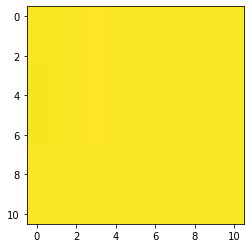

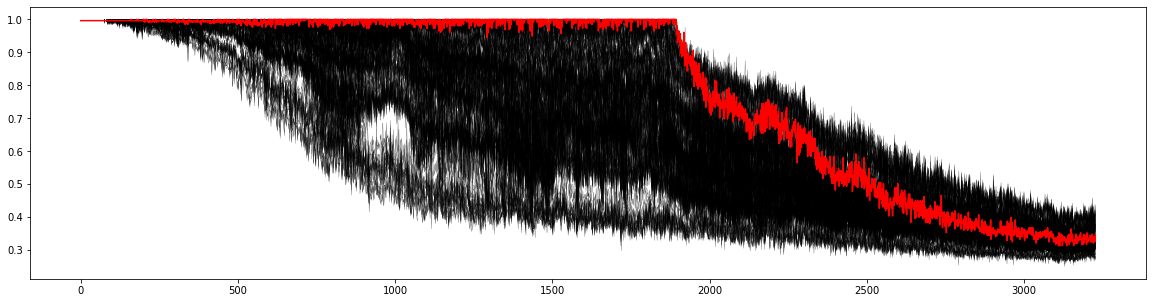

In [41]:
# Plot air conditioner
ind = 10
plt.imshow(feat_acs[ind][:, :, 90], clim=[0, 1])
plt.figure(figsize=(20,5))
dum = plt.plot(feat_acs[ind].reshape(121, 3228).T, "k", lw=0.2)
dum = plt.plot(feat_acs[ind][5, 5], "r")

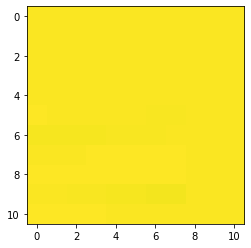

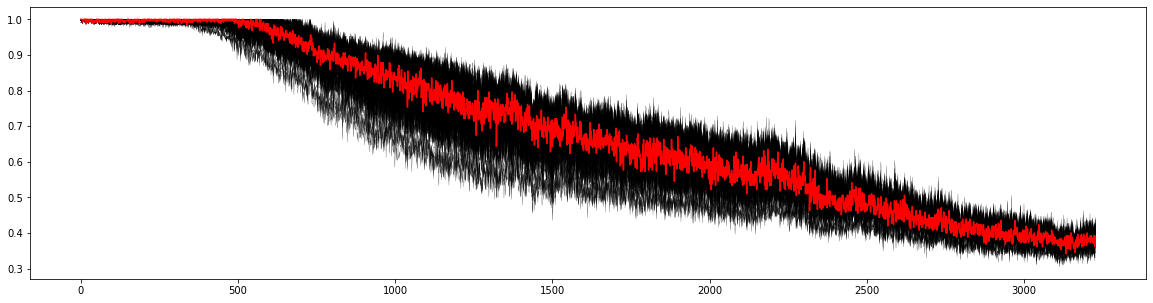

In [42]:
# Plot
ind = 90
plt.imshow(feat_bld[ind][:, :, 90], clim=[0, 1])
plt.figure(figsize=(20,5))
dum = plt.plot(feat_bld[ind].reshape(121, 3228).T, "k", lw=0.2)
dum = plt.plot(feat_bld[ind][5, 5], "r")

In [43]:
# Feature
#feat = np.vstack([feat_acs, feat_bld])
feat = np.vstack([feat_acs, feat_bld, feat_sky, feat_win])
print(feat.shape)
# standardize the features
#feat = (feat - feat.mean(axis=1, keepdims=True)) / feat.std(axis=1, keepdims=True)

(360, 11, 11, 3228)


In [44]:
feat_acs[1,1,1,:]

array([0.99607843, 0.99607843, 0.99607843, ..., 0.39607843, 0.38823529,
       0.36862745])

#Change Point Detection

[Tech Randk Blog (August 14, 2019) "A Brief Introduction to Change Point Detection using Python"](https://techrando.com/2019/08/14/a-brief-introduction-to-change-point-detection-using-python/)


Change point detection (or CPD) detects abrupt shifts in time series trends (i.e. shifts in a time series’ instantaneous velocity), that can be easily identified via the human eye, but are harder to pinpoint using traditional statistical approaches. CPD is applicable across an array of industries, including finance, manufacturing quality control, energy, medical diagnostics, and human activity analysis


There are a couple of other packages that offer change point detection, available via Python:

1. The ruptures package, a Python library for performing offline change point detection
2. Calling the R changepoint package into Python using the rpy2 package, an R-to-Python interface
3. The changefinder package, a Python library for online change point detection

Out of the three options, I find options #1 and #3 the simplest for implementation as they don’t require downloading and configuring R and rpy2 in a Python. Let’s explore options #1 and #3 further.






#Example: feat_acs[1,5,5,:]

##1.The ruptures Package

Charles Truong adapted the ruptures package from the R changepoint package. It specifically focuses on offline changepoint detection, where the whole sequence is analyzed. Out of all of the Python changepoint options, it is the best documented. We can install it using the basic pip install command:

The package offers a variety of search methods (binary segmentation, Pelt, window-based change detection, dynamic programming, etc.), as well as multiple cost functions to play around with. In this tutorial, we focus specifically on search methods.


In [45]:
!pip install ruptures

     |████████████████████████████████| 706kB 16.0MB/s 


In [52]:
import ruptures as rpt

**the search methods available in the ruptures package**
 including binary segmentation, Pelt, window-based change detection, and dynamic programming

* Pruned Exact Linear Time (PELT) search method: The PELT method is an exact method, and generally produces quick and consistent results. It detects change points through the minimization of costs (4). The algorithm has a computational cost of O(n), where n is the number of data points (4). For more info on the PELT method, check out [this paper](https://www.semanticscholar.org/paper/The-Power-of-the-Pruned-Exact-Linear-Time%28PELT%29-in-Wambui-Waititu/87ad359ffcc89a5e1111d7031c3db5957ba6c553?p2df).

* Dynamic programming search method: This is an exact method, which has a considerable computational cost of O(Qn^2 ), where Q is the max number of change points and n is the number of data points (4). For more info on the dynamic programming search method, check out [this paper](https://arxiv.org/pdf/1801.00718.pdf).

* Binary segmentation search method: This method is arguably the most established in literature (4). Binary segmentation is an approximate method with an efficient computational cost of O (n log n), where n is the number of data points (4). The algorithm works by iteratively applying a single change point method to the entire sequence to determine if a split exists. If a split is detected, then the sequence splits into two sub-sequences (5). The same process is then applied to both sub-sequences, and so on (5). For more info on binary segmentation, check out [this paper](https://www.lancaster.ac.uk/pg/rohrbeck/ResearchTopicI.pdf).

* Window-based search method: This is a relatively simple approximate search method. The window-based search method “computes the discrepancy between two adjacent windows that move along with signal y” (6). When the two windows are highly dissimilar, a high discrepancy between the two values occurs, which is indicative of a change point (6). Upon generating a discrepancy curve, the algorithm locates optimal change point indices in the sequence (6). For more info on the window-based search method, check out [this paper](https://arxiv.org/pdf/1801.00718.pdf).

In [49]:
#Convert the time series values to a numpy 1D array
points=np.array(feat_acs[0,5,5,:])

* **Pruned Exact Linear Time (PELT) search method:** The PELT method is an exact method, and generally produces quick and consistent results. It detects change points through the minimization of costs (4). The algorithm has a computational cost of O(n), where n is the number of data points (4). 

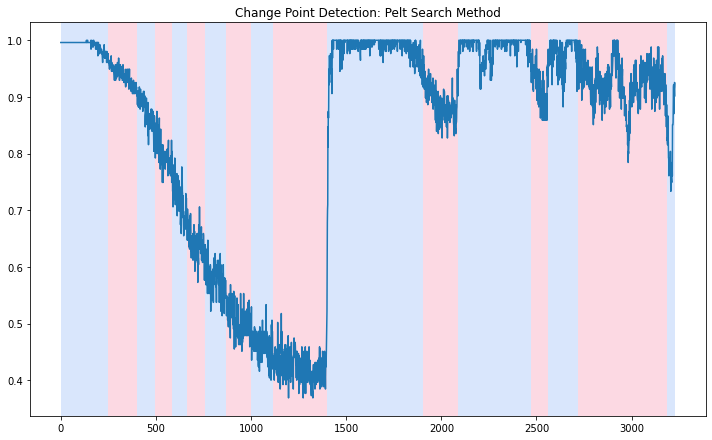

In [129]:
points=np.array(feat_acs[0,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

* **Dynamic programming search method:** This is an exact method, which has a considerable computational cost of O(Qn^2 ), where Q is the max number of change points and n is the number of data points (4). 

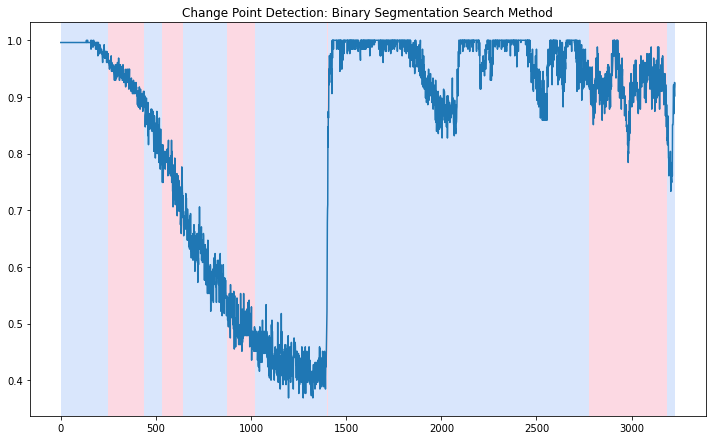

In [131]:
points=np.array(feat_acs[0,5,5,:])

#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()

* **Binary segmentation search method:** This method is arguably the most established in literature (4). Binary segmentation is an approximate method with an efficient computational cost of O (n log n), where n is the number of data points (4). The algorithm works by iteratively applying a single change point method to the entire sequence to determine if a split exists. If a split is detected, then the sequence splits into two sub-sequences (5). The same process is then applied to both sub-sequences, and so on (5). 

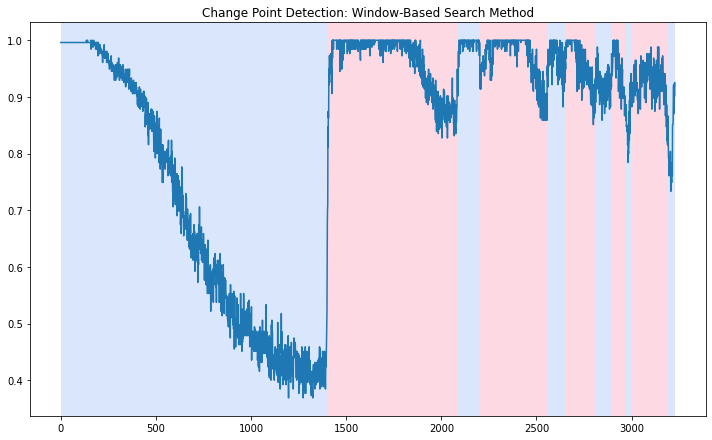

In [132]:
points=np.array(feat_acs[0,5,5,:])

#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()

* **Window-based search method:** This is a relatively simple approximate search method. The window-based search method “computes the discrepancy between two adjacent windows that move along with signal y” (6). When the two windows are highly dissimilar, a high discrepancy between the two values occurs, which is indicative of a change point (6). Upon generating a discrepancy curve, the algorithm locates optimal change point indices in the sequence (6).

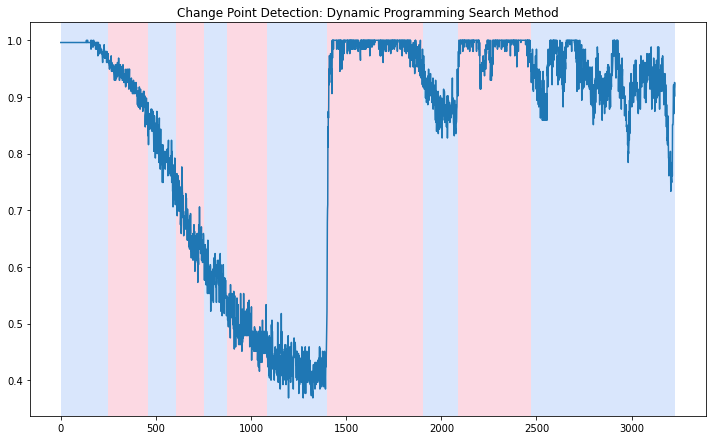

In [133]:
points=np.array(feat_acs[0,5,5,:])

#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()

As you can see in the graphics above, the detected change points in the sequence differ based on the search method used. The optimal search method depends on what you value most when subsetting the time series. The PELT and dynamic programming methods are both exact (as opposed to approximate) methods, so they are generally more accurate.


In this research, I found the PELT method has more detected change points than other methods. Therefore, I chose the PELT method.

##3. Changefinder Package

The changefinder package is specifically for online change point detection. To perform change point detection, the package uses SDAR modelling, or sequentially discounting autoregression time series modelling. SDAR is exactly what it sounds like–it’s an extension of autoregressive (AR) modelling, where older data points in the sequence are ‘discounted’, i.e. are less important than more recent values in the sequence. Because recent data is weighed more heavily in an SDAR model, SDAR is well-suited for online change point detection, which focuses on detecting the most recent changes in a sequence.

Autoregressive modeling (AR) is one of the most popular forms of time series modeling, where the current value is predicted based on previous values in the sequence (3). For more information on SDAR models (as well as multivariate SDVAR models), check out [this paper](https://www.semanticscholar.org/paper/Change-Points-Detection-of-Vector-Autoregressive-Saaid-Nur/c56d4adad7ed3f504015bc6bbc663e21e55f174b?p2df).



In [60]:
!pip install changefinder

     |████████████████████████████████| 163kB 18.7MB/s 
  Created wheel for changefinder: filename=changefinder-0.3-cp36-none-any.whl size=3824 sha256=2154bb93037b3c1fd5059ac6277fb5f70fb0b6368dde593fb1ccde8f3071c4bb
  Stored in directory: /root/.cache/pip/wheels/ab/1c/de/3c0c0e4a6ee252b83ae19b252f3ae4f0a8ba4799c253afbd92
Successfully built changefinder


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [61]:
import changefinder

In [64]:
#Create a synthetic data set to test against
points=np.array(feat_acs[0,5,5,:])

run the data through the ChangeFinder function, and generate an anomaly score, based on SDAR, for each data point:

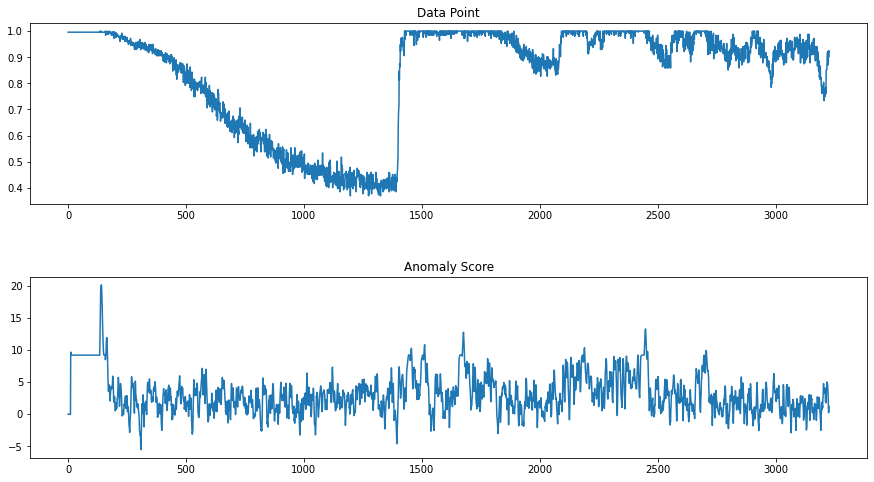

In [134]:
points=np.array(feat_acs[0,5,5,:])

#CHANGEFINDER PACKAGE
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,8))
f.subplots_adjust(hspace=0.4)
ax1.plot(points)
ax1.set_title("Data Point")
#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
ax2.plot(scores)
ax2.set_title("Anomaly Score")
plt.show() 

In the above visual, the anomaly score peaks at time around 1500,1700, and 2400, which corresponds to points where massive shifts in the time series occur. Setting a minimum threshold for anomaly scores, where anything above a certain threshold corresponds to a change point in the sequence, is the best way to identify individual change points in the series.

#Multiple Points

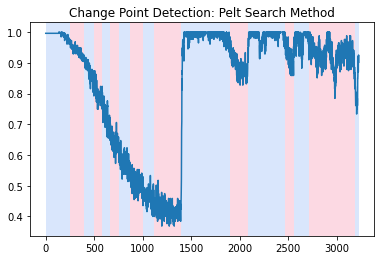

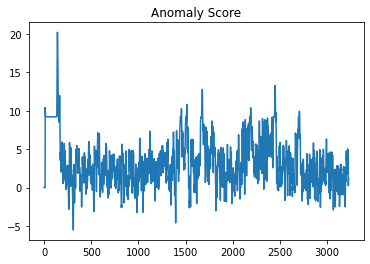

In [104]:
points=np.array(feat_acs[0,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

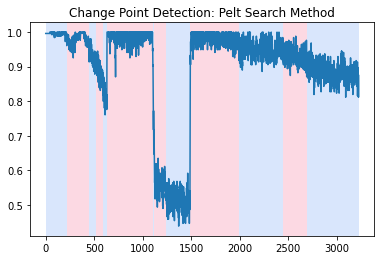

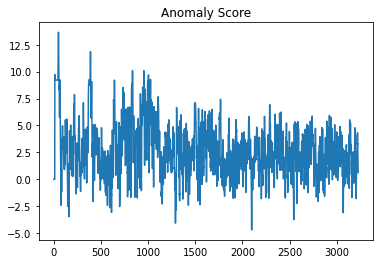

In [99]:
points=np.array(feat_acs[1,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

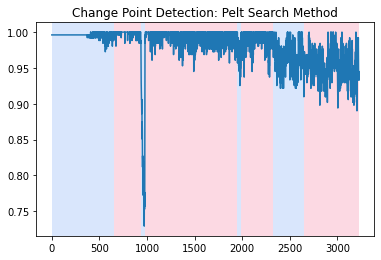

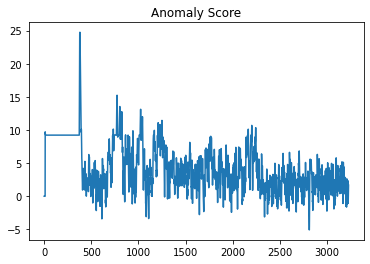

In [100]:
points=np.array(feat_acs[2,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

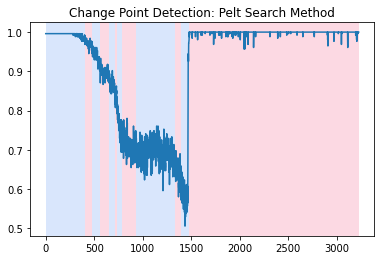

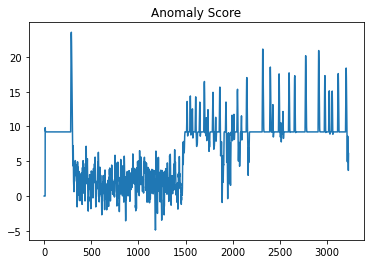

In [101]:
points=np.array(feat_acs[3,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

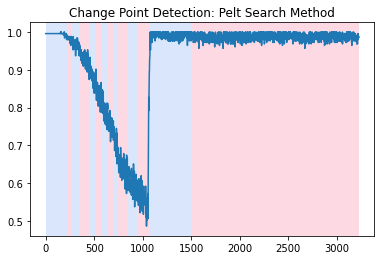

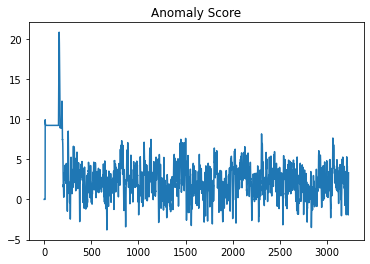

In [102]:
points=np.array(feat_acs[4,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

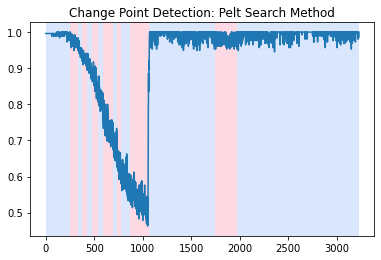

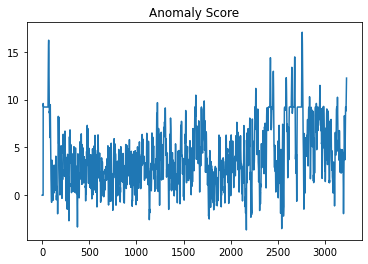

In [103]:
points=np.array(feat_acs[5,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

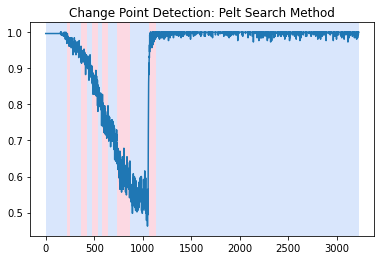

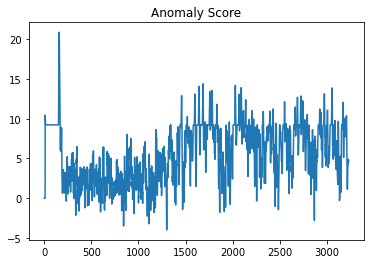

In [105]:
points=np.array(feat_acs[6,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

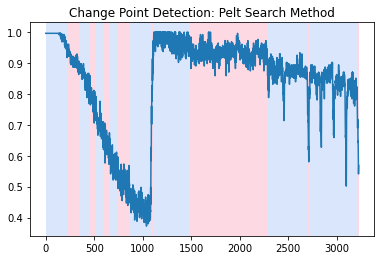

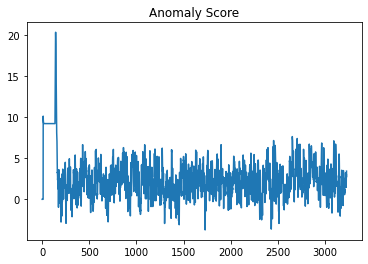

In [106]:
points=np.array(feat_acs[7,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

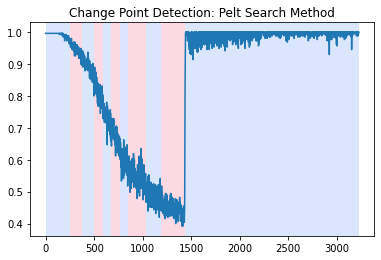

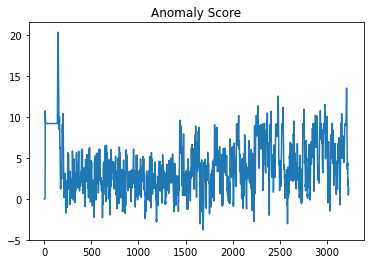

In [107]:
points=np.array(feat_acs[8,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

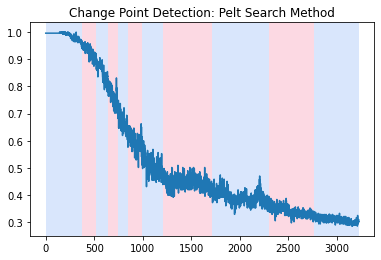

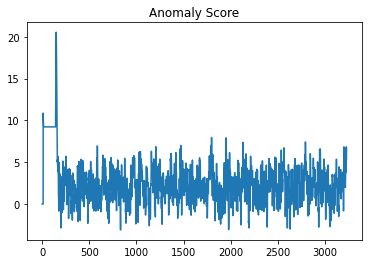

In [108]:
points=np.array(feat_acs[9,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

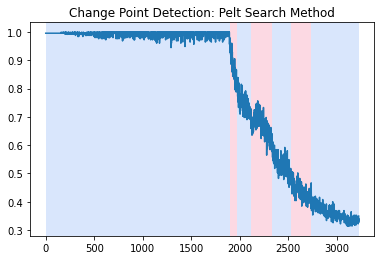

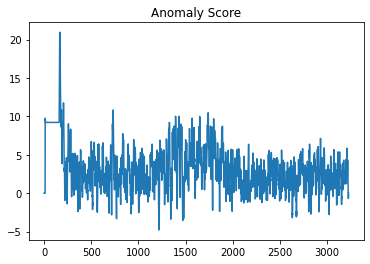

In [109]:
points=np.array(feat_acs[10,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

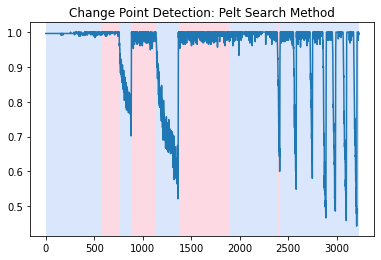

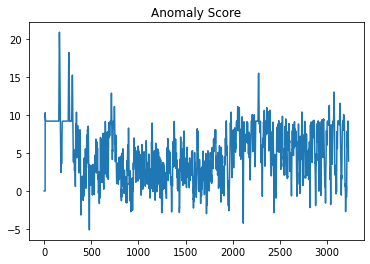

In [110]:
points=np.array(feat_acs[11,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

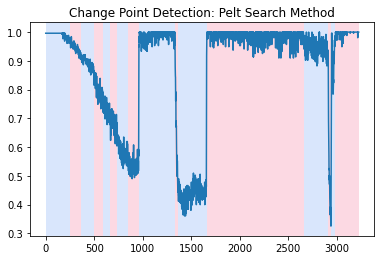

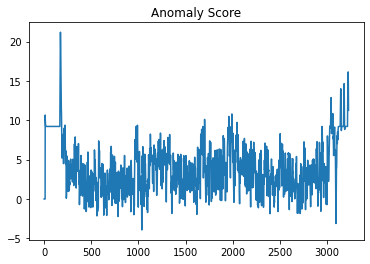

In [111]:
points=np.array(feat_acs[12,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

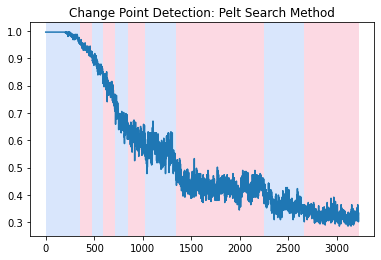

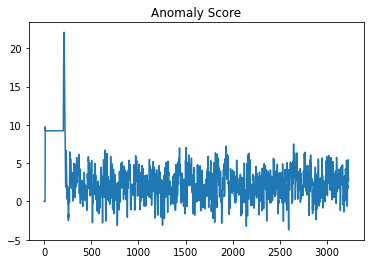

In [112]:
points=np.array(feat_acs[13,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

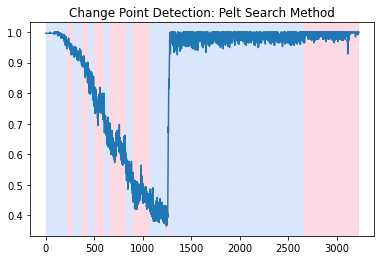

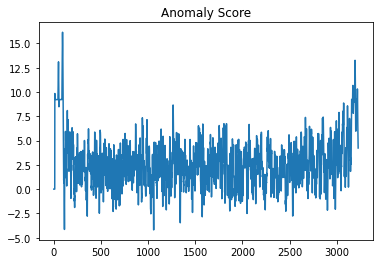

In [113]:
points=np.array(feat_acs[14,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

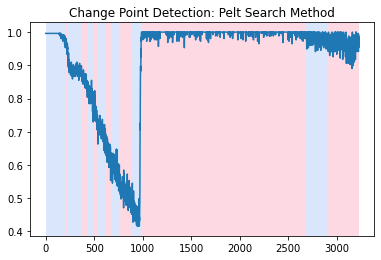

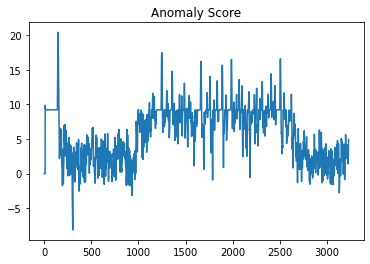

In [114]:
points=np.array(feat_acs[15,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

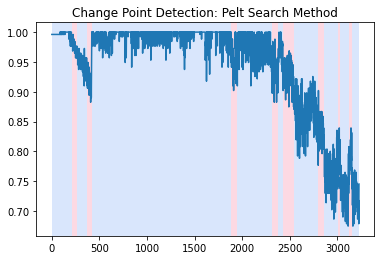

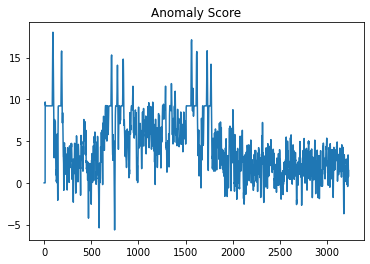

In [115]:
points=np.array(feat_acs[16,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

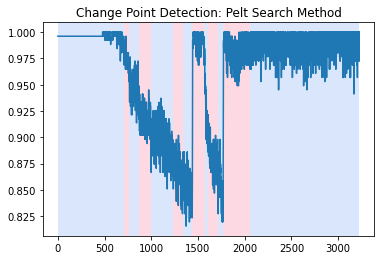

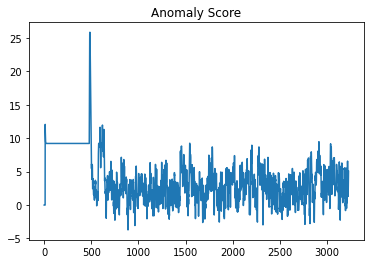

In [116]:
points=np.array(feat_acs[17,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

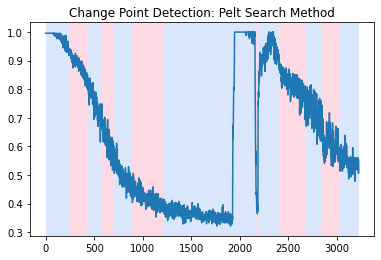

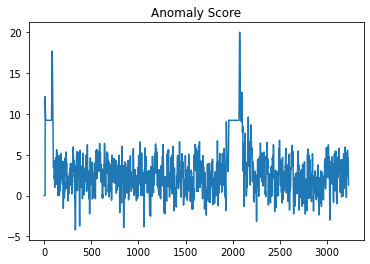

In [117]:
points=np.array(feat_acs[18,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

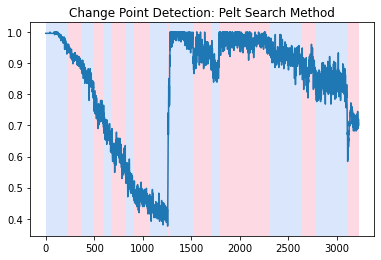

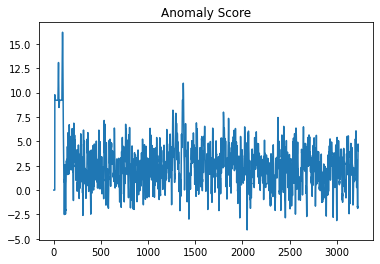

In [118]:
points=np.array(feat_acs[19,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

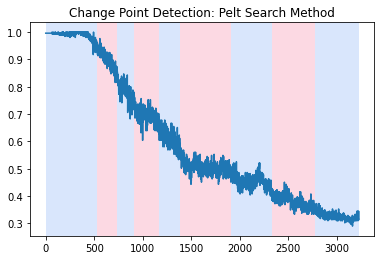

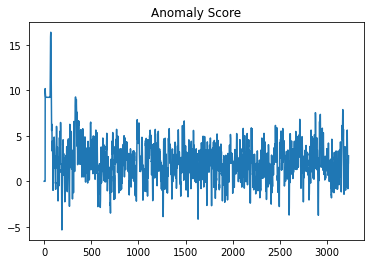

In [119]:
points=np.array(feat_acs[20,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

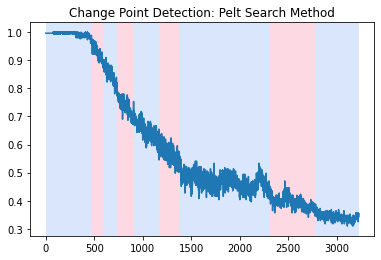

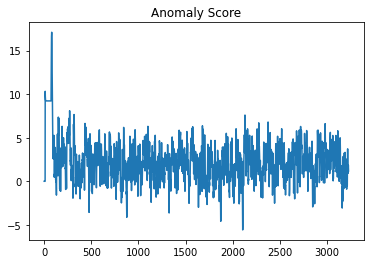

In [120]:
points=np.array(feat_acs[21,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

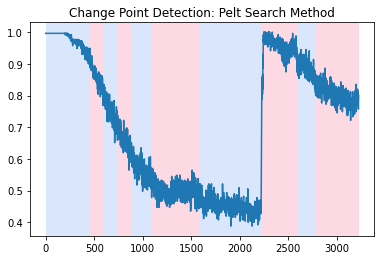

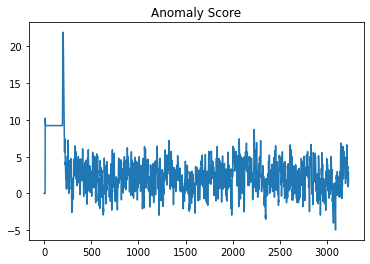

In [121]:
points=np.array(feat_acs[22,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

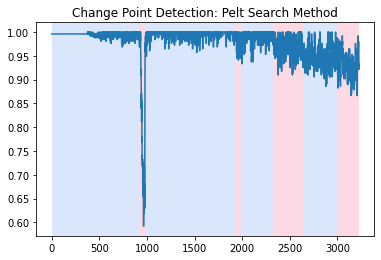

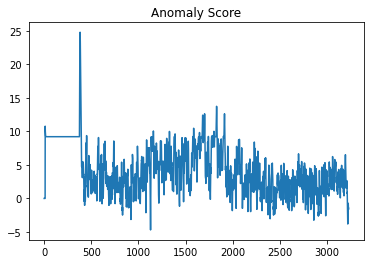

In [122]:
points=np.array(feat_acs[23,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

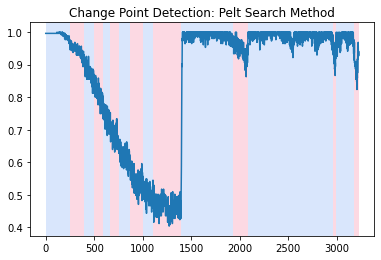

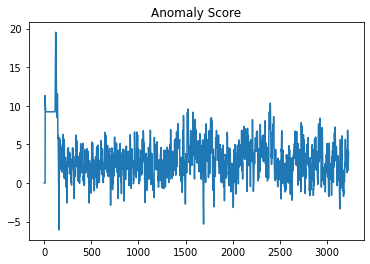

In [123]:
points=np.array(feat_acs[24,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

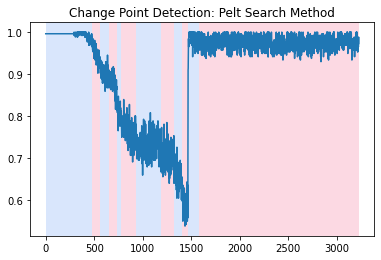

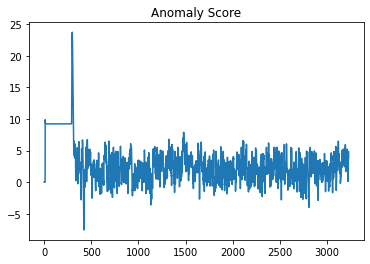

In [124]:
points=np.array(feat_acs[25,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

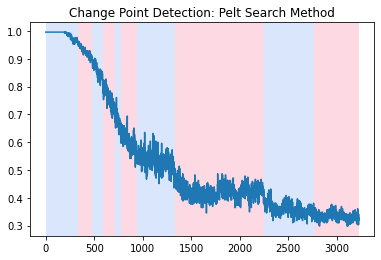

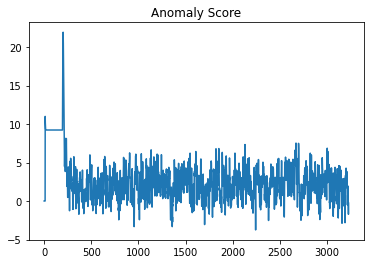

In [125]:
points=np.array(feat_acs[26,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

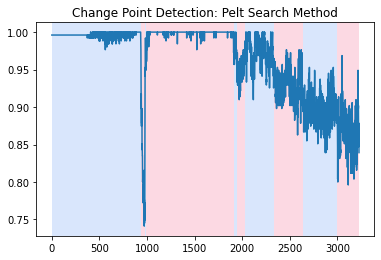

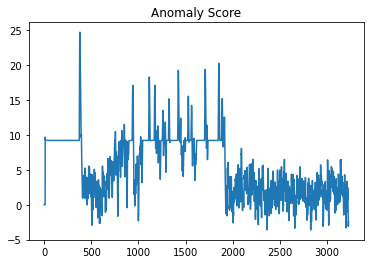

In [126]:
points=np.array(feat_acs[27,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

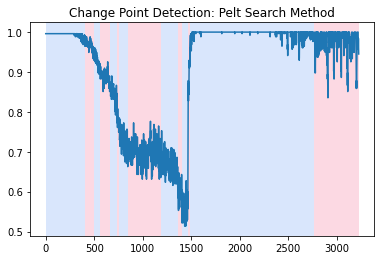

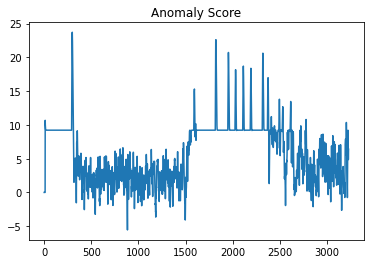

In [127]:
points=np.array(feat_acs[28,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 

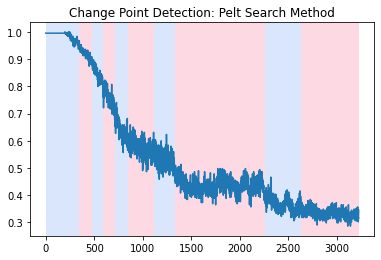

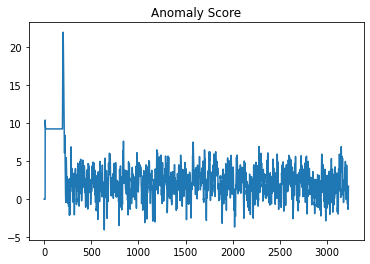

In [128]:
points=np.array(feat_acs[29,5,5,:])

#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(5.4, 3.5))
plt.title('Change Point Detection: Pelt Search Method')
plt.show() 

#Initiate changefinder function
cf = changefinder.ChangeFinder()
scores = [cf.update(p) for p in points]
plt.plot(scores)
plt.title("Anomaly Score")
plt.show() 